Models for COMP562 Final Project

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [20]:
df = pd.read_csv("./data/diabetes_binary_dataset.csv")

In [3]:
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [4]:
# drop_columns = ['Sex', 'AnyHealthcare', 'Fruits', 'Veggies']
# df.drop(drop_columns , axis= 1 ,inplace=True)

In [5]:
X_data = df.drop("Diabetes_binary", axis = 1)
Y_data = df["Diabetes_binary"]
label_encoder = LabelEncoder()
Y_data = label_encoder.fit_transform(Y_data)


In [6]:
#80-20 cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)


Logistic Regression Model


In [7]:
lg = LogisticRegression(max_iter = 2000)
lg.fit(X_train, Y_train)
lg_pred = lg.predict(X_test)
lg_pred_prob = lg.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, lg_pred, average = 'weighted')
acc = accuracy_score(Y_test, lg_pred)
prec = precision_score(Y_test, lg_pred, average = 'weighted')
recall = recall_score(Y_test, lg_pred, average = 'weighted')
lg_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(lg_scores[i], 5)))


f1:0.74839
acc:0.7485
prec:0.74901
recall:0.7485


<Axes: >

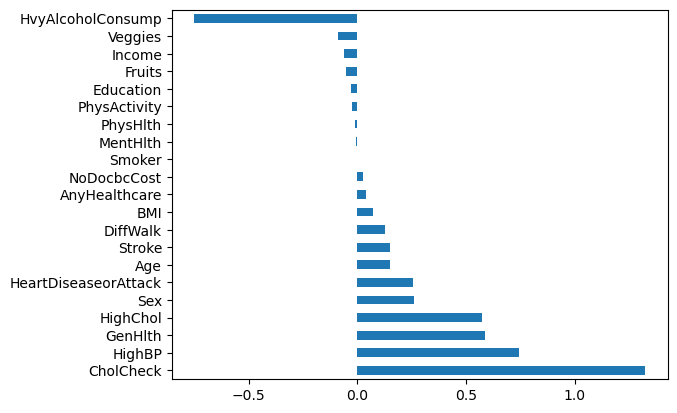

In [8]:
log_imp = pd.Series(lg.coef_[0], index = X_train.columns)
log_imp.sort_values(ascending = False, inplace = True)
log_imp.plot.barh()

In [9]:
matrix = classification_report(Y_test,lg_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Decision tree Classifier Model

In [10]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)
dt_pred=dt.predict(X_test)
dt_pred_prob = dt.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, dt_pred, average = 'weighted')
acc = accuracy_score(Y_test, dt_pred)
prec = precision_score(Y_test, dt_pred, average = 'weighted')
recall = recall_score(Y_test, dt_pred, average = 'weighted')
lg_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(lg_scores[i], 5)))


f1:0.72549
acc:0.72594
prec:0.72758
recall:0.72594


In [11]:
matrix = classification_report(Y_test,dt_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.75      0.69      0.71      7090
           1       0.71      0.77      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



<Axes: >

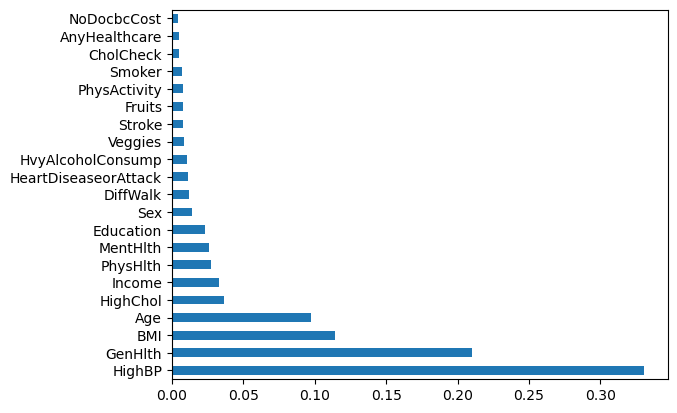

In [12]:
dt_imp = pd.Series(dt.feature_importances_, index = X_train.columns)
dt_imp.sort_values(ascending = False, inplace = True)
dt_imp.plot.barh()

Random Forest Model

In [13]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =15, random_state=42 )
rf.fit(X_train , Y_train)
rf_pred=rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, rf_pred, average = 'weighted')
acc = accuracy_score(Y_test, rf_pred)
prec = precision_score(Y_test, rf_pred, average = 'weighted')
recall = recall_score(Y_test, rf_pred, average = 'weighted')
lg_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(lg_scores[i], 5)))

f1:0.74397
acc:0.74447
prec:0.74658
recall:0.74447


In [14]:
matrix = classification_report(Y_test,rf_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7090
           1       0.72      0.79      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



<Axes: >

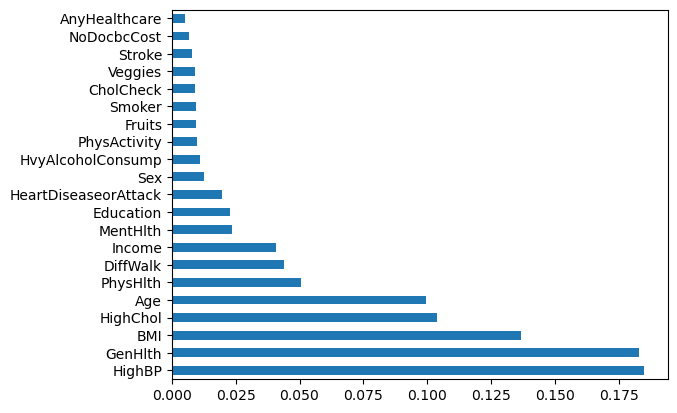

In [15]:
rf_imp = pd.Series(rf.feature_importances_, index = X_train.columns)
rf_imp.sort_values(ascending = False, inplace = True)
rf_imp.plot.barh()

KNN has bugs

In [31]:
# knn = KNeighborsClassifier(n_neighbors= 6)
# knn.fit(X_train , Y_train)
# knn_pred=knn.predict(X_test)
# knn_pred_prob = knn.predict_proba(X_test)

# metrics = ['f1', 'acc', 'prec', 'recall']
# f1 = f1_score(Y_test, knn_pred, average = 'weighted')
# acc = accuracy_score(Y_test, knn_pred)
# prec = precision_score(Y_test, knn_pred, average = 'weighted')
# recall = recall_score(Y_test, knn_pred, average = 'weighted')
# lg_scores = [f1, acc, prec, recall]
# for i in range(0, 4):
#     print(metrics[i] + ':' + str(round(lg_scores[i], 5)))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

SVM

In [ ]:
# from sklearn.svm import SVC
# clf = SVC(kernel='rbf', C=1.0)

# # train the model
# clf.fit(X_train, Y_train)

# y_pred=clf.predict(X_test)

# print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

# print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

XGBoost

In [24]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xgb.fit(X_train , Y_train)
xgb_pred=xgb.predict(X_test)
xgb_pred_prob = xgb.predict_proba(X_test)

f1 = f1_score(Y_test, xgb_pred, average = 'weighted')
acc = accuracy_score(Y_test, xgb_pred)
prec = precision_score(Y_test, xgb_pred, average = 'weighted')
recall = recall_score(Y_test, xgb_pred, average = 'weighted')
y_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(y_scores[i], 5)))

f1:0.75367
acc:0.75416
prec:0.75637
recall:0.75416


<Axes: >

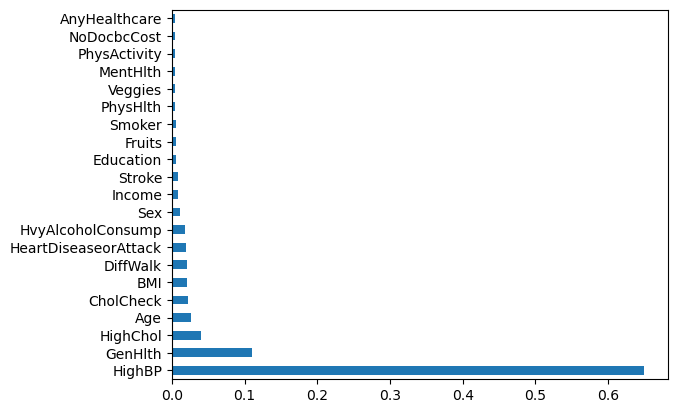

In [25]:
xgb_imp = pd.Series(xgb.feature_importances_, index = X_train.columns)
xgb_imp.sort_values(ascending = False, inplace = True)
xgb_imp.plot.barh()

In [26]:
matrix = classification_report(Y_test,xgb_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      7090
           1       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

